<a href="https://colab.research.google.com/github/anaramos5582/bootcamp-womakerscode/blob/main/RegressaoLogistica_AnaPaulaBarrosRamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Womakers Code - Modelos de Classificação e Regressão Logística
## By Ana Paula Barros Ramos

### Bibliotecas


In [ ]:
# Importando as bibliotecas

# Manipulação de Arquivos
from google.colab import files

# Manipulação de dados
import pandas as pd
import numpy as np
from sklearn import datasets

# Encoding
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Atividade 1

1. Utilizando o dataset iris (iris.csv em anexo ou usando o sklearn):
Exemplo de como fazer a importação do dataset usando o sklearn
from sklearn import datasets

  iris = datasets.load_iris()

  Responda:

  a. Faça uma análise inicial sobre esse dataset.

  b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.

  c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

  d. Aplique a regressão logística para avaliar o modelo de
classificação.

  e. Calcule a acurácia, precisão e recall.

  f. Plote a matriz de confusao com matplotlib ou seaborn

### Carregamento dos Dados

In [ ]:
files.upload()
df_iris = pd.read_csv('iris.csv')

Saving iris.csv to iris.csv


### Sumário dos Dados e Sumário Estatístico

In [ ]:
df_iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df_iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Análise Exploratória

In [ ]:
# Analisando os valores nulos
df_iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [ ]:
# Analisando os tipos de espécies
df_iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df_iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Visualização dos Dados

In [ ]:
# Set paleta padrão para o seaborn
sns.set_palette("Paired")

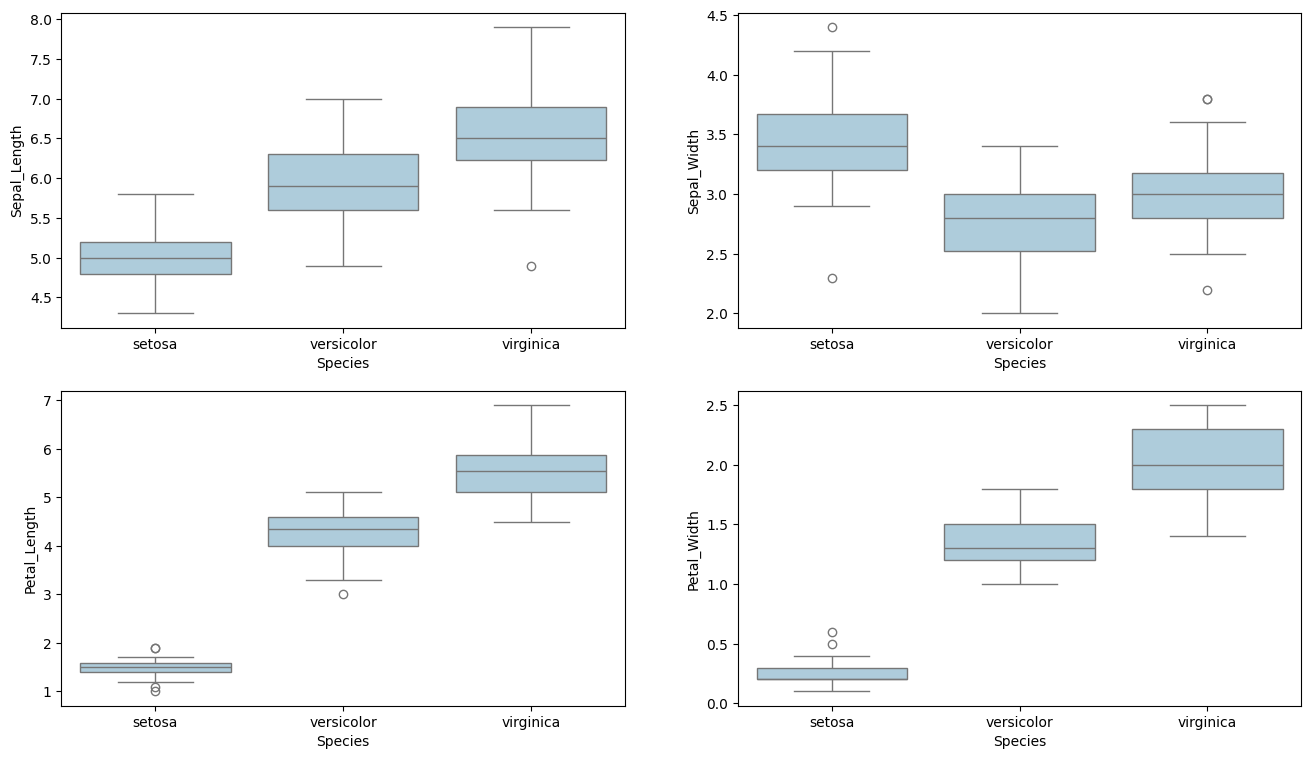

In [ ]:
# Análise por Boxplot
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='Sepal_Length', x= 'Species', data=df_iris, ax=axes[0, 0])
sns.boxplot( y='Sepal_Width', x= 'Species', data=df_iris, ax=axes[0, 1])
sns.boxplot( y='Petal_Length', x= 'Species', data=df_iris, ax=axes[1, 0])
sns.boxplot( y='Petal_Width', x= 'Species', data=df_iris, ax=axes[1, 1])
plt.show()

<Axes: xlabel='Petal_Width', ylabel='Count'>

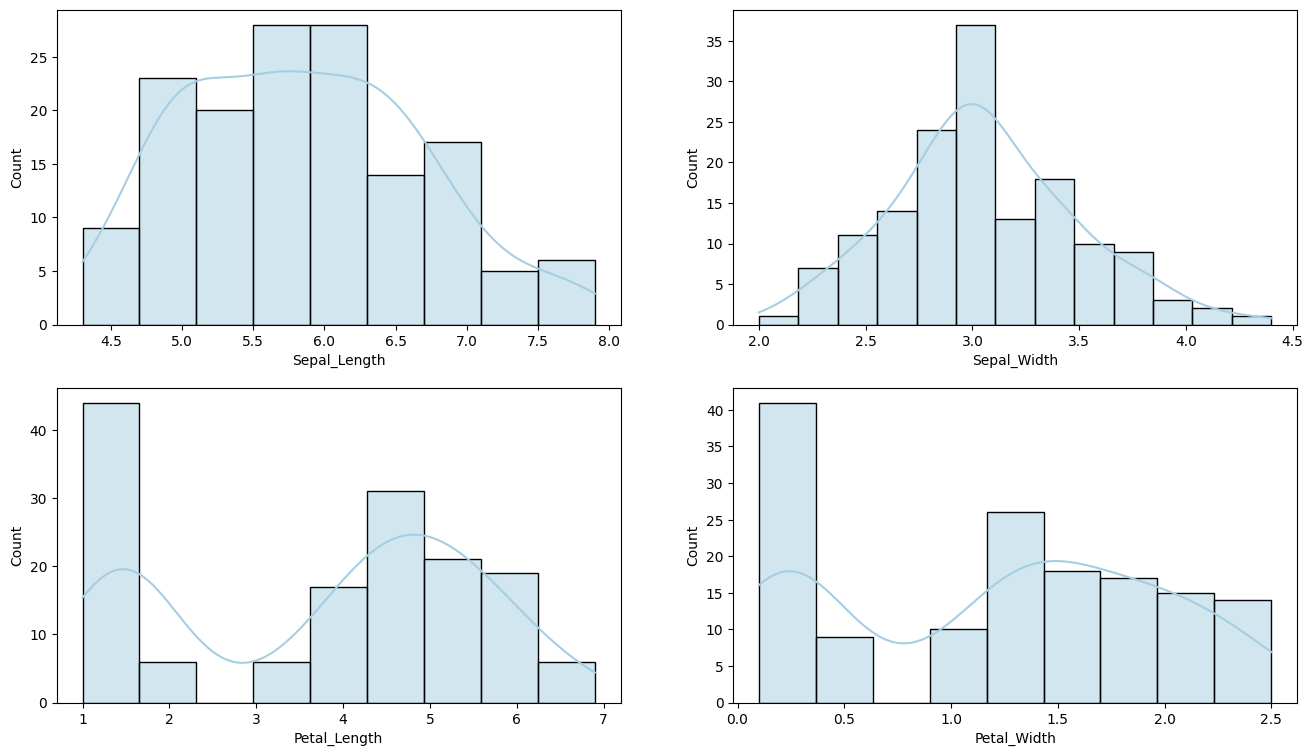

In [ ]:
feature_names=df_iris.columns[:-1]

fig, axes = plt.subplots(2, 2, figsize=(16, 9))
sns.histplot( df_iris['Sepal_Length'], kde=True, ax=axes[0, 0])
sns.histplot( df_iris['Sepal_Width'], kde=True, ax=axes[0, 1])
sns.histplot( df_iris['Petal_Length'], kde=True, ax=axes[1, 0])
sns.histplot( df_iris['Petal_Width'], kde=True, ax=axes[1, 1])

Os gráficos confirmam a presença de outliers, especialmente nas características de Petal_Lenght e Petal_Width.

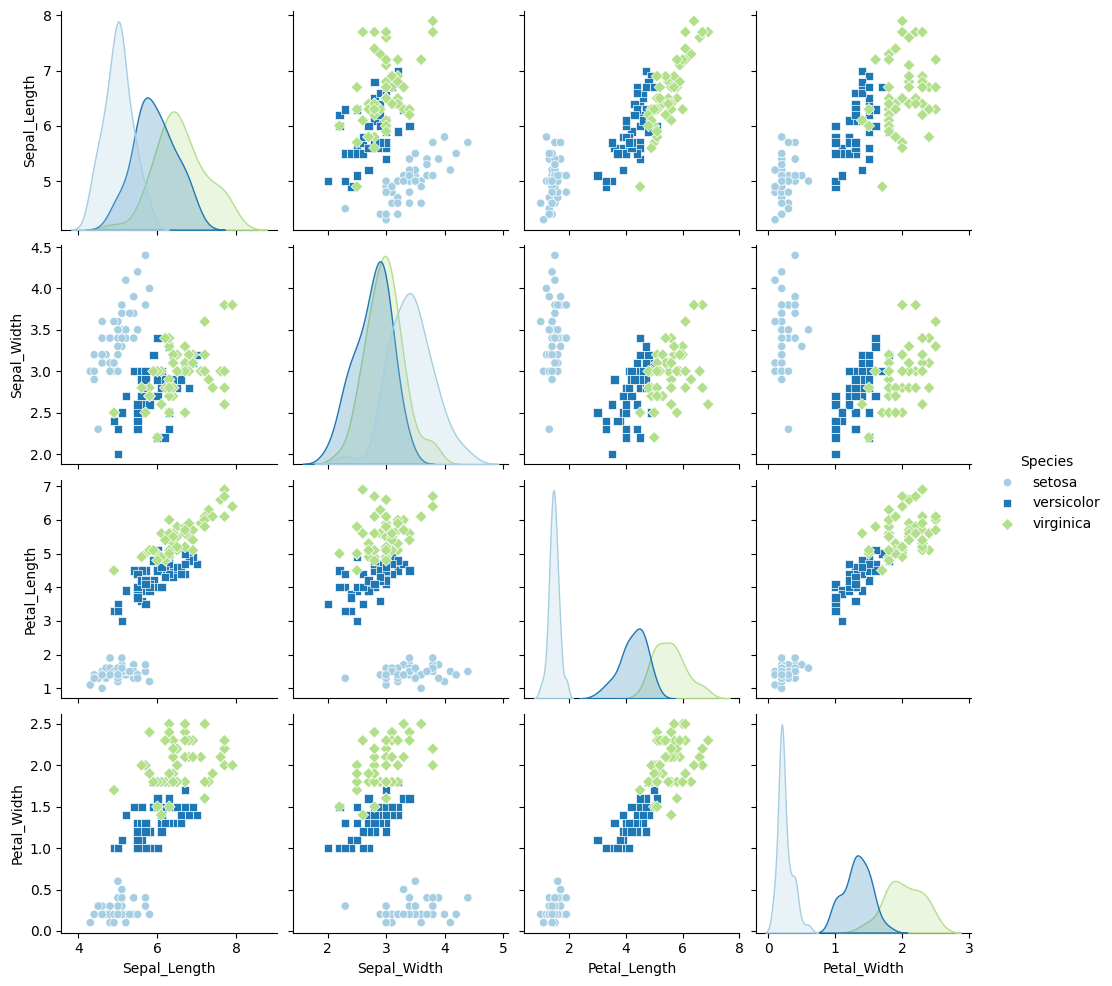

In [ ]:
pairplot = sns.pairplot(df_iris, hue='Species', markers=["o", "s", "D"])
plt.show()

É possível observar que as variáveis têm distribuição diferentes entre as diferentes classes, embora haja uma leve variação entre as características da largura das sépalas entre as três classes. Já considerando o comprimento e a largura das pétalas da classe setosa apresenta um valor muito maior que as outras duas classes, podendo dizer que se a largura é superior a 1.5 e comprimento superior a 3, a flor pertence à classe setosa.

### Preprocessamento dos Dados

In [ ]:
# Cópia do Dataset original
df_new = df_iris.copy()

In [ ]:
# Cria o objeto encoder
le = LabelEncoder()

In [ ]:
df_new['Species'] = le.fit_transform(df_new['Species'])

In [ ]:
df_new

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


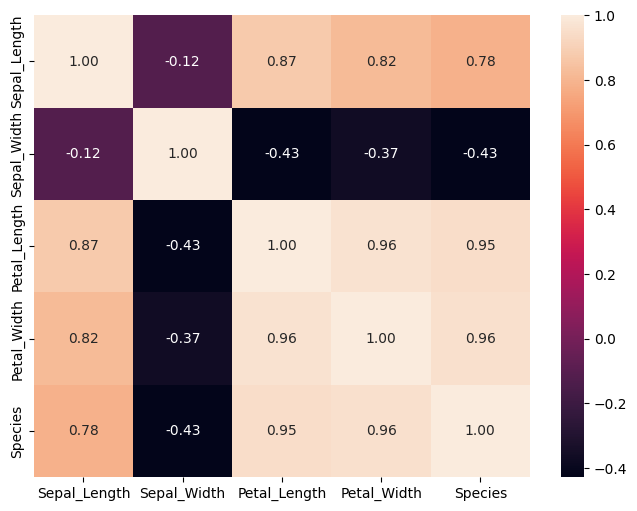

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f')
plt.show()

As configurações de comprimento da pétala e largura da pétala apresentam uma forte correlação, assim como ambas apresetam uma forte correlação com a variável comprimento da sépala, sugestionando uma possível multicolinearidade.

## Criação Dataset de Treinamento e o de Validação (Treino e Teste)

In [ ]:
features = df_new.columns[:-1]
target= 'Species'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new[target], test_size=0.2, random_state=20)

# Verificar as dimensões dos conjuntos de treino e teste
print(f'Conjunto de treino: {X_train.shape}')
print(f'Conjunto de teste: {X_test.shape}')

Conjunto de treino: (120, 4)
Conjunto de teste: (30, 4)


## Criação do Modelo utilizando Regressão Logística (RL)

In [ ]:
# Cria o modelo de regressão logística
# Definindo o limite de 200 iterações, garantindo que o algoritmo de otimização do ajuste dos coeficiente não continue a iterar indefinidamente
reg = linear_model.LogisticRegression(max_iter=200)

# Treina o modelo
reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Score dos dados de treino
print ('Score dos dados de Treino:', reg.score(X_train, y_train))
# Score dos dados de teste
print ('Score dos dados de Teste:', reg.score(X_test, y_test))

Score dos dados de Treino: 0.9666666666666667
Score dos dados de Teste: 0.9333333333333333


## Avaliação do Modelo RL

In [ ]:
# Previsão do Modelo no conjunto de teste
y_predict = reg.predict(X_test)

In [ ]:
# Avaliação do Modelo
print('Relatório de Classificação:')
print(metrics.classification_report(y_test, y_predict))

# macro: calcula as métricas para cada classe individualmente e, em seguida, faz a média simples das métricas.
print(f'Acurácia Reg Log.: {metrics.accuracy_score(y_test, y_predict)}')
print(f'Precisão Reg Log.: {metrics.precision_score(y_test, y_predict, average="macro")}')
print(f'Recall Reg Log.: {metrics.recall_score(y_test, y_predict, average="macro")}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

Acurácia Reg Log.: 0.9333333333333333
Precisão Reg Log.: 0.9487179487179488
Recall Reg Log.: 0.9393939393939394


Considerando que o dataset tem uma classificação multiclasse as métricas de precisão e recall foram resumidas através da opção 'macro', a qual calcula as métricas para cada classe individualmente e, em seguida, faz a média simples das métricas.

A **acurácia** indica a que o modelo acertou de 93.33 % de previsões corretas em relação ao total de previsões.

A **precisão** indica que quando o modelo prevê a classe, ele está correto 94.87% das vezes.

A **recall** de 93.93% indica a proporção de verdadeiros positivos sobre o positivos reais.

O **Supporte** representa o número de ocorrências de cada classe no conjunto de teste.

In [ ]:
print("Matriz de Confusão:")
print(metrics.confusion_matrix(y_test, y_predict))

Matriz de Confusão:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


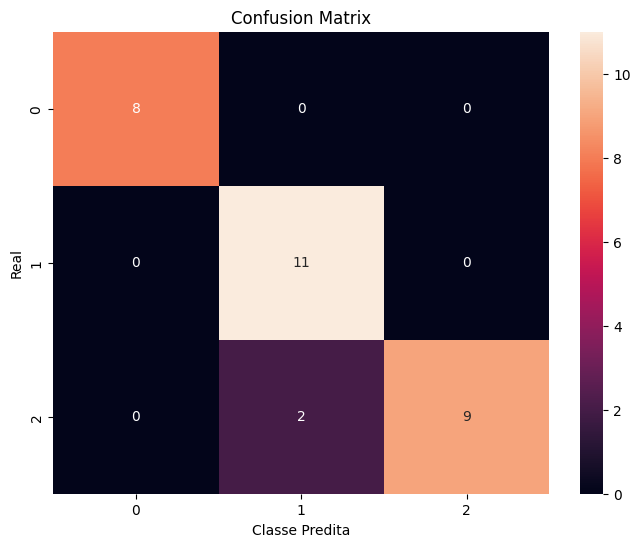

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('Classe Predita')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

O modelo apresentou maior dificuldade em prever as observações da classe 2.

## Analisando os coeficientes do Modelo RL

In [ ]:
# Analisando os coeficientes do Modelo
coefficients = reg.coef_
feature_names = features.tolist()
feature_names

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [ ]:
reg_coef = pd.DataFrame(coefficients, columns=feature_names, index=['Class 0: Iris-setosa', 'Class 1: Iris-versicolor', 'Class 2: Iris-virginica'])
reg_coef

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Class 0: Iris-setosa,-0.490483,0.810265,-2.354296,-0.959669
Class 1: Iris-versicolor,0.480390,-0.295852,-0.084729,-0.976961
Class 2: Iris-virginica,0.010094,-0.514414,2.439025,1.936630


### Considerando o modelo ser multiclasse, analisamos os coeficientes do modelo, a fim de entender a influência de cada variável na probabilidade da amostra pertencer a cada classe.

#### Treinamento da Classe 0 (Iris-setosa) versus as outras:
Os coeficientes indicam que, para a classe Iris-setosa, um aumento na largura da sépala aumenta a probabilidade de a flor ser Iris-setosa. No entanto, um aumento no valor do comprimento da sépala ou da pétala, assim como, um aumento na largura da pétala diminui a probabilidade da amostra pertencer à classe Iris-setosa.

#### Treinamento da  Classe 1 (Iris-versicolor) versus as outras:
Os coeficientes indicam que, para a classe Iris-versicolor, um aumento no comprimento da sépala aumenta a probabilidade de a flor ser Iris-versicolor. No entanto, um aumento em outra característica diminui a probabilidade da amostra pertencer à classe Iris-versicolor.

#### Treinamento da Classe 2 (Iris-virginica) versus as outras:
Os coeficientes indicam que, para a classe Iris-virginica, um aumento no comprimento da sépala diminui a probabilidade de a flor ser Iris-virginica. No entanto, um aumento em outra característica aumenta a probabilidade da amostra pertencer à classe Iris-virginica.

### Avaliando o Modelo de Árvore de Decisão

In [ ]:
# Analisando a aplicação do Modelo Árvore de decisão
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_tree_predict = dtree.predict(X_test)

tree_acc = metrics.accuracy_score(y_test, y_tree_predict)
print("Acurácia Árvore:", tree_acc)

tree_precision = metrics.precision_score(y_test, y_tree_predict, average="macro")
print("Precisão Árvore:", tree_precision)

tree_recall = metrics.recall_score(y_test, y_tree_predict, average="macro")
print("Recall Árvore:", tree_recall)

tree_conf = metrics.confusion_matrix(y_test, y_tree_predict)
tree_conf

Acurácia Árvore: 0.9333333333333333
Precisão Árvore: 0.9487179487179488
Recall Árvore: 0.9393939393939394


array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]])

## Conclusão

O modelo proposto, de regressão logística, apresenta uma acurácia alta e boas métricas de precisão, recall e F1-score. É observado que as métricas se mantém quando utilizando o modelo de árvore de decisão.

A matriz de confusão descreve o desempenho de ambos os modelos e identifica que o modelo apresentou maior dificuldade em classificar a classe 2.

As configurações de comprimento da pétala e largura da pétala apresentam uma forte correlação, assim como ambas apresetam uma forte correlação com a variável comprimento da sépala, sugestionando uma possível multicolinearidade.

# Atividade 2

2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:

from sklearn.datasets import load_digits
digits = load_digits()

Responda:

a. Faça uma análise inicial sobre esse dataset

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados categóricos?

b. Aplique a regressão logística para avaliar o modelo de classificação.

c. Calcule a acurácia, precisão e recall.

d. Plote a matriz de confusão com matplotlib ou seaborn

e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

f. Calcule a acurácia, precisão e recall.

g. Plote a matriz de confusao com matplotlib ou seaborn

In [ ]:
# Carregando os dados
digits = datasets.load_digits()
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [ ]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [ ]:
df_digits.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [ ]:
# Verificando as classes
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


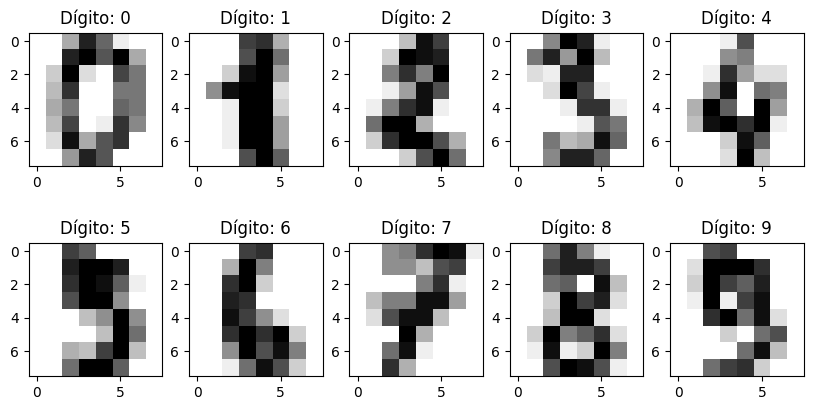

In [ ]:
# Visualizar algumas imagens e seus rótulos
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):

    # display dos dados como imagem
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'Dígito: {label}')
plt.show()

## Criação Dataset de Treinamento e o de Validação (Treino e Teste)

In [ ]:
## Criação e Treinamento do Modelo
X_train, X_test, y_train, y_test = train_test_split(df_digits,digits.target, test_size=0.2, random_state=20)

# Verificar as dimensões dos conjuntos de treino e teste
print(f'Conjunto de treino: {X_train.shape}')
print(f'Conjunto de teste: {X_test.shape}')

Conjunto de treino: (1437, 64)
Conjunto de teste: (360, 64)


## Criação do Modelo utilizando Regressão Logística (RL)

In [ ]:
# Cria o modelo de regressão logística
reg = linear_model.LogisticRegression(max_iter=12000)

# Treina o modelo
reg.fit(X_train, y_train)

LogisticRegression(max_iter=12000)

### Avaliação do Modelo RL

In [ ]:
# Previsão do Modelo no conjunto de Teste
y_predict = reg.predict(X_test)

In [ ]:
# Avaliação do Modelo
print('Relatório de Classificação:')
print(metrics.classification_report(y_test, y_predict))

# macro: calcula as métricas para cada classe individualmente e, em seguida, faz a média simples das métricas.
print(f'Acurácia Reg Log.: {metrics.accuracy_score(y_test, y_predict)}')
print(f'Precisão Reg Log.: {metrics.precision_score(y_test, y_predict, average="macro")}')
print(f'Recall Reg Log.: {metrics.recall_score(y_test, y_predict, average="macro")}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.94      0.95        31
           2       1.00      1.00      1.00        28
           3       0.95      1.00      0.97        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       0.98      0.98      0.98        45
           7       0.97      0.97      0.97        40
           8       0.97      0.97      0.97        35
           9       0.97      0.94      0.95        32

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Acurácia Reg Log.: 0.9777777777777777
Precisão Reg Log.: 0.9778311921053856
Recall Reg Log.: 0.976688718987106


O modelo apresenta ótimas métricas, com uma acurância de 97,77% de previsões corretas sobre o total de previsões feitas.

**Precisão**: 97,78% de verdadeiros positivos sobre todos os positivos previstos.

**Recall**: 97,66% de verdadeiros positivos sobre todos os casos reais positivos.

**F1-Score**: Média da precisão e da recall.

**Suporte**: Número de ocorrências de cada classe no conjunto de teste.

In [ ]:
print("Matriz de Confusão:")
print(metrics.confusion_matrix(y_test, y_predict))

Matriz de Confusão:
[[30  0  0  0  0  1  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  1 24  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  1  0]
 [ 0  0  0  1  0 26  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  1  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  0  0  0  1  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  1 41]]


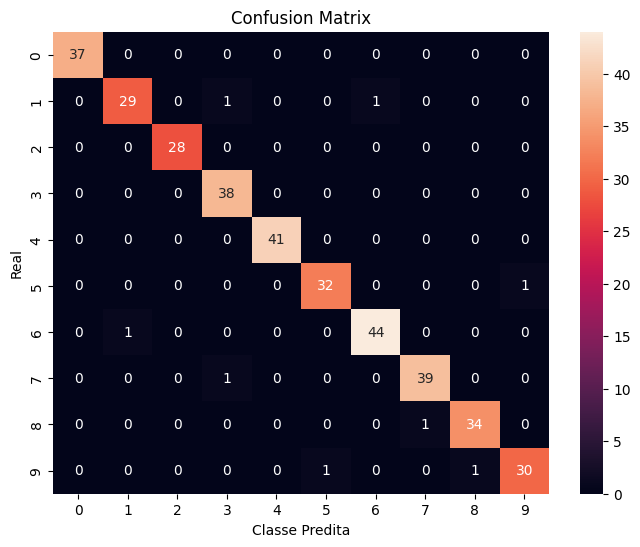

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('Classe Predita')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

A matriz de confusão descreve o desempenho do modelo e identifica que o modelo apresentou maior dificuldade em classificar as classe 1 e 9.